<a href="https://colab.research.google.com/github/quiet-codes/fish-vs-weight-regression/blob/main/fish_weight_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing libraries
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Importing the dataset
url = 'https://raw.githubusercontent.com/quiet-codes/fish-vs-weight-regression/refs/heads/main/Fish.csv'
df = pd.read_csv(url)

In [19]:
#Making x and y
x= df['Length2'].values
y= df['Weight'].values

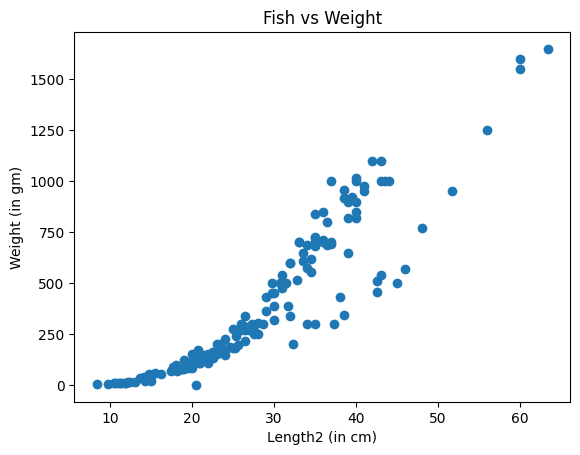

In [20]:
#Plotting the graph
plt.scatter(x,y)
plt.xlabel('Length2 (in cm)')
plt.ylabel('Weight (in gm)')
plt.title('Fish vs Weight')
plt.show()

In [21]:
# Model : f_wb = w*x[i] + b
# w,b --> parameters
# f_wb --> dependant variable
# x[i] -->independant variable


In [22]:
# Cost_function J(w,b)

def cost_fn(x,y,w,b):

  m= x.shape[0]
  cost=0

  for i in range(m):
    f_wb=w*x[i]+b
    cost+=(f_wb-y[i])**2

  cost/=(2*m)
  return cost

In [23]:
# Gradient_function dj_dw and dj_db
def gradient_fn(x,y,w,b):

  m=x.shape[0]

  dj_dw=0
  dj_db=0

  for i in range(m):
    f_wb=w*x[i]+b
    dj_db+=(f_wb-y[i])
    dj_dw+=(f_wb-y[i])*x[i]

  dj_db/=m
  dj_dw/=m
  return dj_dw,dj_db


In [25]:
# Gradient Descent algorithm:

# repeat till convergence {
#    w = w - alpha*dj_dw
#    b = b - alpha*dj_db
# }

def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_fn,gradient_fn):
  #This is used for graphs
  J_history=[]

  w= copy.deepcopy(w_in) #Avoid overwriting original arrays
  b=b_in

  for i in range(num_iters):
    dj_dw,dj_db=gradient_fn(x,y,w,b)

  #Updating the value of w,b
    w=w-alpha*dj_dw
    b=b-alpha*dj_db

  #saving J at each iteration:
    if i<100000:
      J_history.append(cost_fn(x,y,w,b))

  #printing the value of cost at intervals 10 times or as many if i<10
    if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

  return w,b,J_history

In [50]:
#Defining Parameters

w_init=0
b_init=0

iterations=1000
tm_alpha = 1.0e-4

w_final,b_final,J_history = gradient_descent(x,y,w_init,b_init,tm_alpha,iterations,cost_fn,gradient_fn)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")




Iteration    0: Cost 122036.18   
Iteration  100: Cost 23826.20   
Iteration  200: Cost 23791.89   
Iteration  300: Cost 23757.66   
Iteration  400: Cost 23723.52   
Iteration  500: Cost 23689.46   
Iteration  600: Cost 23655.49   
Iteration  700: Cost 23621.60   
Iteration  800: Cost 23587.79   
Iteration  900: Cost 23554.07   
(w,b) found by gradient descent: ( 16.2444, -5.3342)


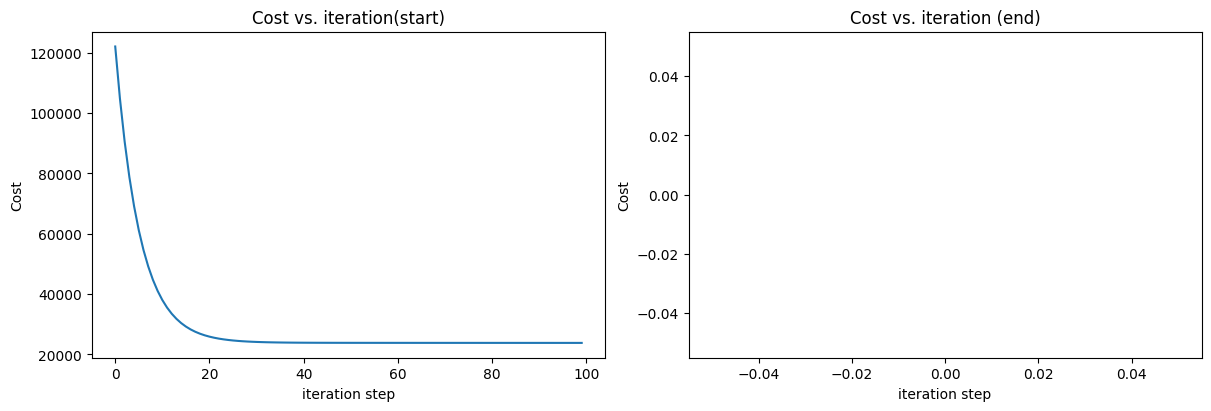

In [51]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [52]:
# Predictions
def predict(x,w,b):
  return w*x + b


In [53]:

predicted_weights = predict(x,w_final,b_final)
predicted_weights

array([ 407.27375974,  421.89372739,  425.14260909,  465.75363035,
        465.75363035,  477.1247163 ,  477.1247163 ,  481.99803885,
        481.99803885,  493.3691248 ,  498.24244735,  498.24244735,
        506.36465161,  514.48685586,  514.48685586,  514.48685586,
        530.73126436,  530.73126436,  538.85346861,  538.85346861,
        546.97567286,  546.97567286,  555.09787711,  563.22008136,
        563.22008136,  563.22008136,  563.22008136,  579.46448987,
        579.46448987,  595.70889837,  620.07551112,  620.07551112,
        636.31991963,  660.68653238,  660.68653238,  223.71194366,
        290.31401852,  300.06066362,  316.30507212,  319.55395382,
        327.67615808,  332.54948063,  335.79836233,  352.04277083,
        352.04277083,  360.16497508,  360.16497508,  360.16497508,
        384.53158784,  374.78494273,  376.40938358,  404.02487804,
        417.02040484,  433.26481334,  509.61353331,  417.02040484,
        425.14260909,  449.50922185,  498.24244735,  585.96225

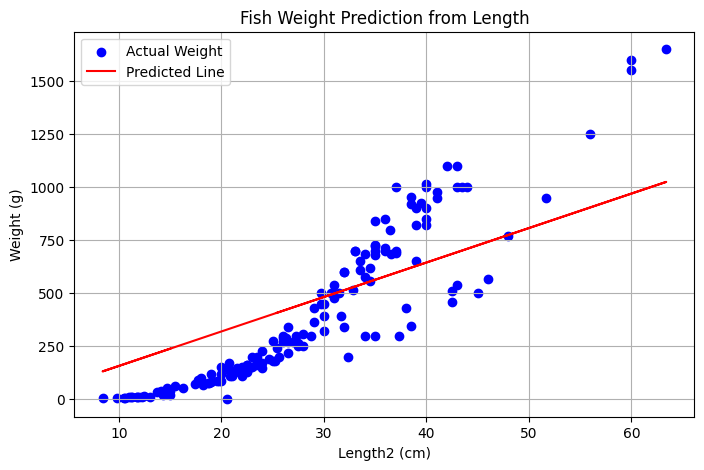

In [55]:
#plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Actual Weight')
plt.plot(x, predicted_weights, color='red', label='Predicted Line')
plt.xlabel("Length2 (cm)")
plt.ylabel("Weight (g)")
plt.title("Fish Weight Prediction from Length")
plt.legend()
plt.grid(True)
plt.show()